In [ ]:
# vectorul(U1,U2) e repartizat unifor pe discul unitate
n=1000
X<-rep(0,n)       #in acest vector vom pastra abscisele
Y<-rep(0,n)       #in acest vector vom pastra ordonatele
i=1
while(i<=n){          #vom folosi o bucla de tip while pentru a genera observatii pana ajungem la una care convine
  U1<-runif(1,-1,1)   #generam observatii uniforme conform algoritmului
  U2<-runif(1,-1,1)
  S<-U1^2+U2^2
  if(S<=1){           #conditia pentru ca observatia generata sa convina
    X[i]<-U1          #daca observatia indeplineste conditia o acceptam si o stocam in vectorii X si Y
    Y[i]<-U2
    i<-i+1            #trecem la generarea urmatoarei observatii
  }
}
df<-data.frame(col1=X,        #afisam observatiile generate sub forma unui tabel, pe prima coloana avem abscisa, iar pe a doua ordonata
               col2=Y)
df

In [ ]:
#1.2.a (Algoritmul Box-Muller, versiunea polara)

n <- 1000
X <- rep(0, n)

gen_disc_unitate <- function(n){
  U1 <- runif(n, -1, 1)             # U1 si U2 sunt uniforme pe [-1,1], de volum n
  U2 <- runif(n, -1, 1)
  S <- U1^2 + U2^2 <= 1             # conditia noastra
  puncte <- data.frame(U1[S], U2[S])
  return(puncte)
}

observatii <- gen_disc_unitate(1000)   #  1000 de observații repartizate uniform pe discul unitate
head(observatii)    # primele câteva observații

,U1.S.,U2.S.
,<dbl>,<dbl>
1,0.11709941,0.9672078
2,0.74320352,-0.6459486
3,-0.68878067,-0.3845397
4,0.78120560,-0.5247966
5,0.07857747,0.7886123
6,-0.81041867,0.5467680


In [ ]:
#1.2.c (Algoritmul Box-Muller, versiunea polara)

generare_algBM_coordpolare <- function(n, miu, sigma) {
  X1 <- rep(0, n)
  X2 <- rep(0, n)
  U1 <- runif(n, -1, 1)
  U2 <- runif(n, -1, 1)
  S <- rep(0, n)
  for (i in 1:n) {
    while (TRUE) {
      S[i] <- U1[i]^2 + U2[i]^2
      if (S[i] <= 1) {
        X1[i] <- U1[i] * sqrt(-2 * log(S[i]) / S[i]) * sigma + miu
        X2[i] <- U2[i] * sqrt(-2 * log(S[i]) / S[i]) * sigma + miu
        break
      }}}
  return(list(X1 = X1, X2 = X2))
}

n <- 100
miu <- c(0, 5, 10)
sigma <- c(1, 5)

for (s in sigma) {
  for (m in miu) {
    rezultat <- generare_algBM_coordpolare(n, m, s)
    hist(rezultat$X1, probability = TRUE, main = paste("Media:", m, ", Varianța:", s), col = "pink", xlab = "Valoare")
    hist(rezultat$X2, probability = TRUE, add = TRUE, main = paste("Media:", m, ", Varianța:", s), col = "lightblue", xlab = "Valoare")
  }}


In [ ]:

valori_n <- c(100, 1000, 10000)

rezultate <- data.frame(
  n = integer(),
  metoda = character(),
  timp_executie = numeric()
)

for (n in valori_n) {
  t_cartezian <- proc.time()                # Măsurarea timpului pentru versiunea cartesiană
  generare_algBM(n, miu, sigma)
  t_cartezian <- proc.time() - t_cartezian

  t_polare <- proc.time()                    # Măsurarea timpului pentru versiunea polară
  generare_algBM_coordpolare(n, miu, sigma)
  t_polare <- proc.time() - t_polare

  rezultate <- rbind(rezultate, data.frame(n = n, metoda = "carteziana", timp_executie = t_carteziana["elapsed"]))
  rezultate <- rbind(rezultate, data.frame(n = n, metoda = "polara", timp_executie = t_polare["elapsed"]))
}

rezultate_medii <- aggregate(timp_executie ~ n + metoda, rezultate, mean)  # rezultatelor medii pentru fiecare metodă
print(rezultate_medii)

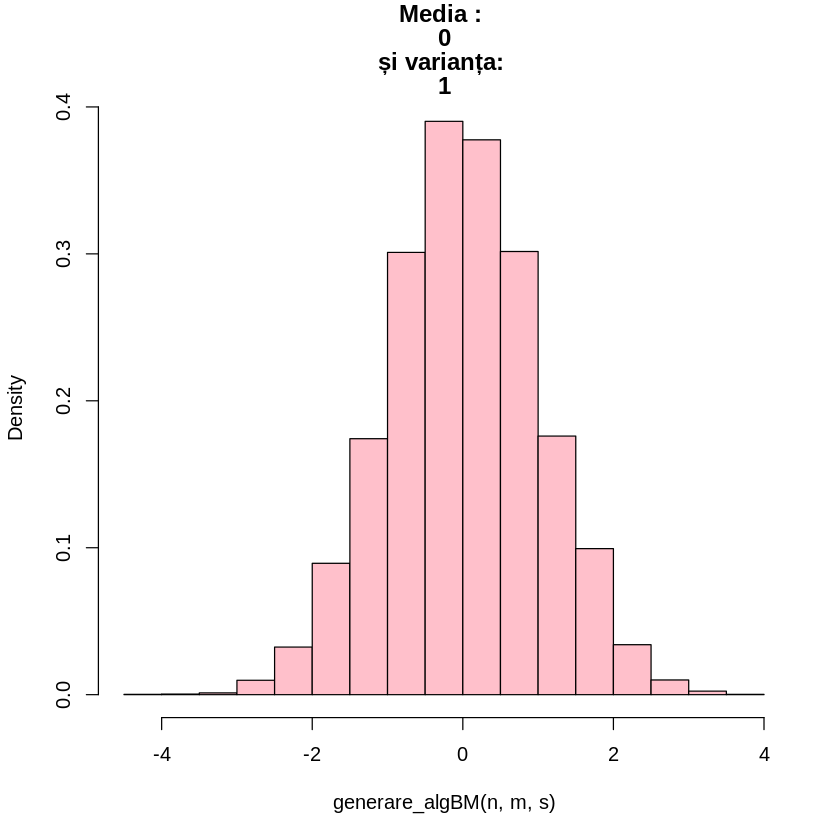

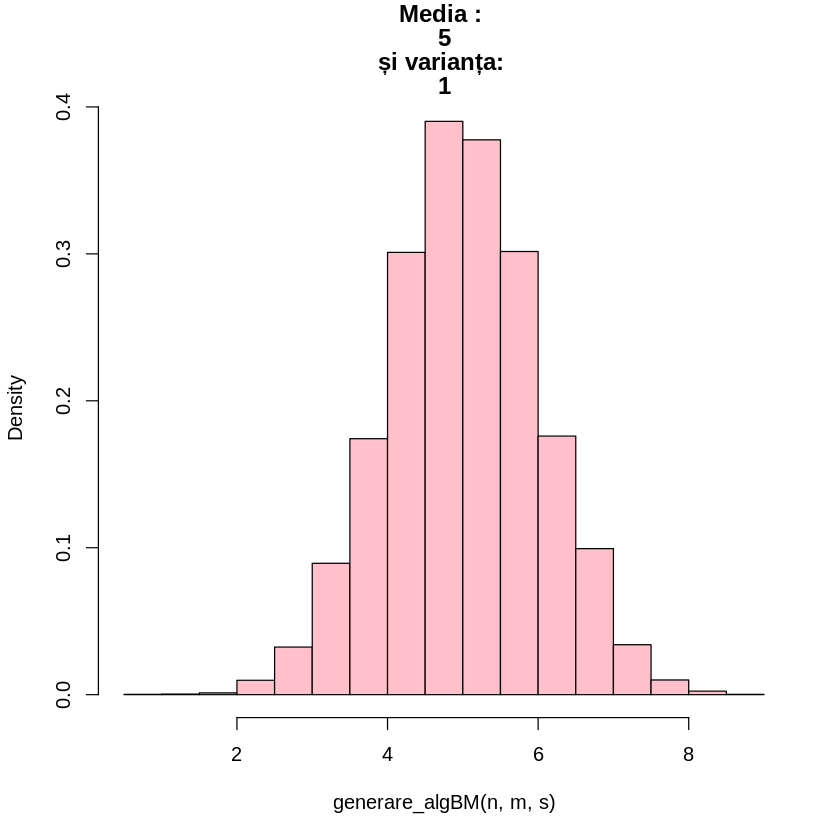

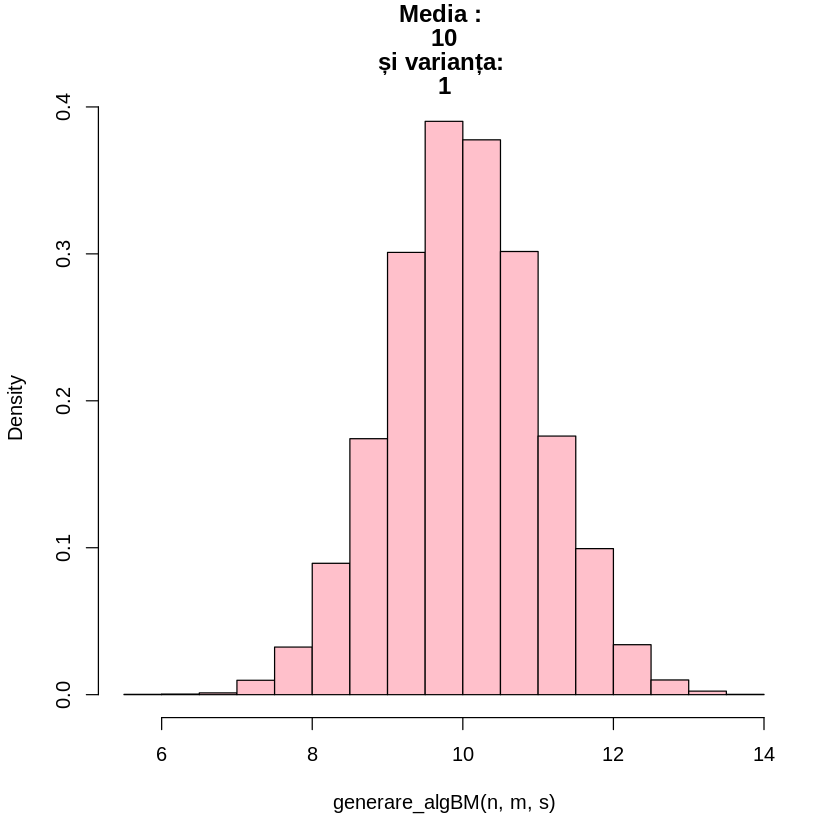

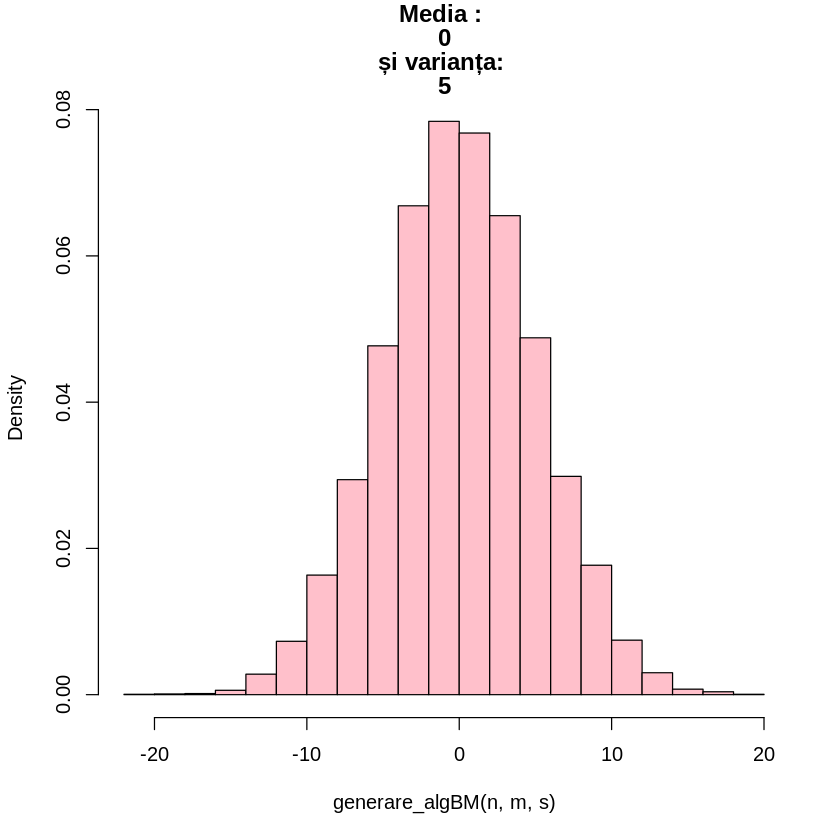

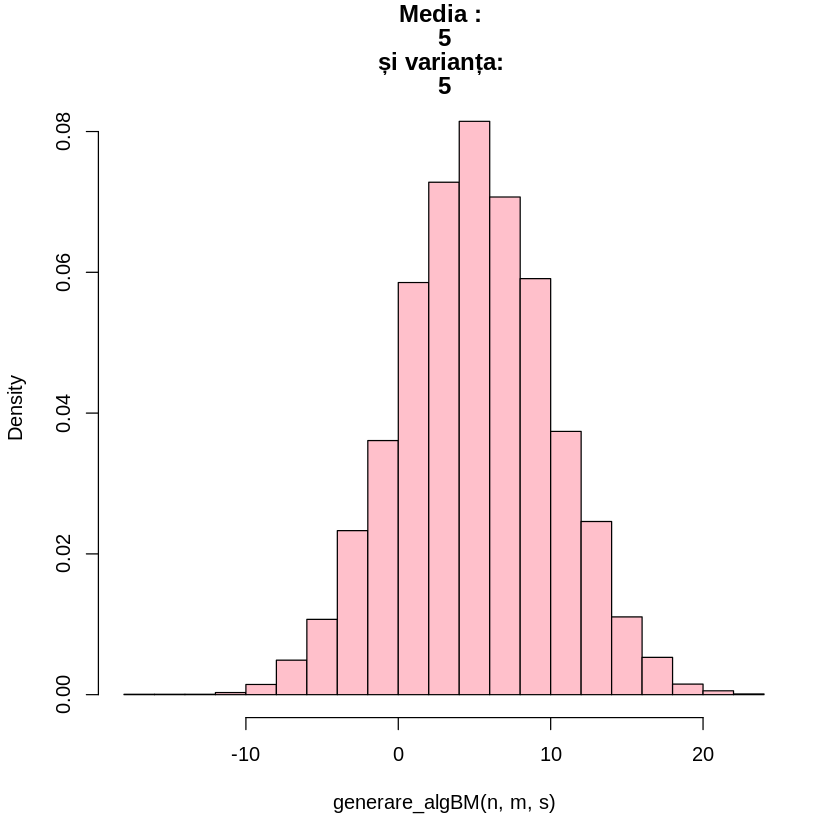

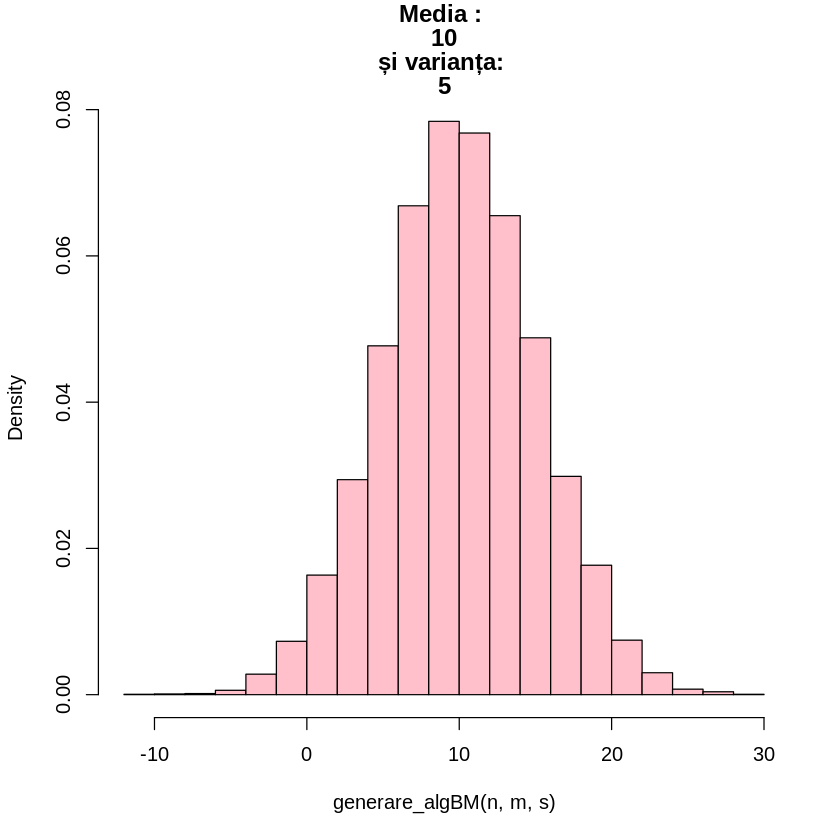

In [ ]:
#1.1.b  (Algoritmul Box-Muller, versiunea carteziana) funcție în R care să permită generarea unui eșantion de volum n dintr-o repartiție N(miu, sigma^2)
# X ~ N(0, 1) => sigma^2 * X + miu ~ N(miu, sigma^2)

n <-10000

X <- rep(0, n)
U1 <- runif(n, 0, 1)    # U1 si U2 sunr uniforme pe [0,1], de volum n
U2 <- runif(n, 0, 1)
generare_algBM <- function(n, miu, sigma){
  for(i in 1:n){
      X[i] <- (sqrt((-2)*log(U1[i]))*cos(2*pi*U2[i]))*sigma + miu
  }
  return(X)
}

miu <- c(0, 5, 10)
sigma <- c(1, 5)

for(s in sigma){
  for(m in miu){                  # probability = TRUE face histograma pentru densitate
    hist(generare_algBM(n, m, s), probability = TRUE, main = c("Media : ", m, "și varianța: " ,s), col = "pink")
  }}

EX 4

Inegalitatea Berry-Esseen este un rezultat celebru cu ajutorul căruia putem determina acuratețea aproximării pe care o realizează TLC. Cerând în plus față de condițiile din TLC ca E[ |X_i| ^3] < inf, avem ca:

  sup | P( Z_n <= x) - phi(x) | <= 33/4 * E[ | X_1 - miu | 3 ] / (sigma^3*sqrt(n)), unde

X_1, ..., X_n i.i.d., phi(x) este funcția de repartiție a normalei standard, miu = E[X_1], sigma=sqrt(Var(X_1)) și Z_n = sqrt(n)* ( X_n_bar - miu) / sigma. (X_n_bar = (X_1 + ... + X_n) / n  )

1. Construiți câte o funcție în R care să calculeze  E[X] și respectiv Var(X), unde tipul repartiției v.a. X este transmis fie printr-o denumire, fie prin funcția de masă în cazul discret, fie prin funcția densitate de probabilitate în cazul continuu.

2. Construiți o funcție în R care să calculeze E[ | X_1 - miu |^3 ]

3. Construiți un data.frame în R care să conțină marginile date de inegalitatea Berry-Esseen pentru repartițiile: Binomială, Geometrică, Poisson, Uniformă pe caz discret și respectiv Exponențială, Gamma și Beta în cazul continuu, pentru un volum al eșantionului n∈{30,100,1000}. Alegerea valorilor parametrilor repartițiilor ilustrate vă revine vouă.

4. Ilustrați grafic pentru n∈{30,100,1000} pentru un interval pe care îl considerați relevant evoluția diferenței P( Z_n <= x) - phi(x) pentru fiecare din repartițiile de mai sus.

5. Construiți o funcție în R care să calculeze marginea dată de inegalitatea Berry-Esseen pentru o v.a. pentru care se cunoaște funcția de masă/funcția densitate de probabilitate.



In [2]:
##1) Calculam E[x] - Functia pentru medie                     # parametri functiei, f = functia de masa / densiatate
E_x <- function(nume, f, f_masa = 0, f_densitate = 0, parametri, x) {
  if (nume == "Binomiala" || identical(f, dbinom)) {
    m <- parametri$m
    p <- parametri$p
    media <- m * p
  } else if (nume == "Geometrica" || identical(f, dgeom)) {
    p <- parametri$p
    media <- 1 / p
  } else if (nume == "Poisson" || identical(f, dpois)) {
    lambda <- parametri$lambda
    media <- lambda
  } else if (nume == "Uniforma discreta" || identical(f, function(x) sample(x = a:b, size = 1, TRUE))) {
    a <- parametri$a
    b <- parametri$b
    media <- (a + b) / 2
  } else if (nume == "Exponentiala" || identical(f, dexp)) {
    lambda <- parametri$lambda
    media <- 1 / lambda
  } else if (nume == "Normala" || identical(f, dnorm)) {
    miu <- parametri$miu
    sigma <- parametri$sigma
    media <- miu
  } else if (nume == "Log-Normala" || identical(f, dlnorm)) {
    miu <- parametri$miu
    sigma <- parametri$sigma
    media <- exp(miu + sigma^2 / 2)
  } else if (nume == "Gamma" || identical(f, dgamma)) {
    alpha <- parametri$alpha                   # shape
    beta <- parametri$beta                     # rate
    media <- alpha / beta
  } else if (nume == "Beta" || identical(f, dbeta)) {
    alpha <- parametri$alpha                    #shape1
    beta <- parametri$beta                      #shape2
    media <- alpha / (alpha + beta)
  } else if (nume == NULL) {
    if (f_masa == 1){                       # cazul in care o variabila discreta este data prin functia de masa
      media <- 0
      for(i in 1:length(x)) {
        media <- media + x[i]*p[i] }}
    else if (f_densitate == 1) {               # cazul in care o variabila continua este data prin densitate
        media <- integrate(x*f(x), -1*Inf, Inf)$value}
  return(media)
}}

# Functia pentru varianta
Varianta_x <- function(nume, f, parametri, x) {
  if (nume == "Binomiala" || identical(f, dbinom)) {
    m <- parametri$m
    p <- parametri$p
    varianta <- m * p * (1 - p)
  } else if (nume == "Geometrica" || identical(f, dgeom)) {
    p <- parametri$p
    varianta <- (1 - p) / (p^2)
  } else if (nume == "Poisson" || identical(f, dpois)) {
    lambda <- parametri$lambda
    varianta <- lambda
  } else if (nume == "Uniforma discreta" || identical(f, function(x) sample(x = a:b, size = 1, TRUE))) {
    a <- parametri$a
    b <- parametri$b
    varianta <- (b - a)^2 / 12
  } else if (nume == "Exponentiala" || identical(f, dexp)) {
    lambda <- parametri$lambda
    varianta <- 1 / lambda^2
  } else if (nume == "Normala" || identical(f, dnorm)) {
    miu <- parametri$miu
    sigma <- parametri$sigma
    varianta <- sigma^2
  } else if (nume == "Log-Normala" || identical(f, dlnorm)) {
    miu <- parametri$miu
    sigma <- parametri$sigma
    varianta <- (exp(sigma^2) - 1) * exp(2 * miu + sigma^2)
  } else if (nume == "Gamma" || identical(f, dgamma)) {
    alpha <- parametri$alpha                   # shape
    beta <- parametri$beta                     # rate
    varianta <- alpha / beta^2
  } else if (nume == "Beta" || identical(f, dbeta)) {
    alpha <- parametri$alpha                    #shape1
    beta <- parametri$beta                      #shape2
    varianta <- (alpha * beta) / ((alpha + beta)^2 * (alpha + beta + 1))
  } else if(nume == NULL)                                                         # calculul variantei folosindu-ne de formula (cu media)
    varianta <- E_x(nume, f, f_masa, f_densitate, parametri, x^2) - (E_x(nume, f, f_masa, f_densitate, parametri, x))^2
  return(varianta)
}

# Binomiala
parametri_binomiala <- list(m = 10, p = 0.5)
media_binom <- E_x("Binomiala", dbinom, f_masa = 0, f_densitate = 0, parametri_binomiala, x)
var_binom <- Varianta_x("Binomiala", dbinom, parametri_binomiala, x)
cat("Binomiala: Media = ", media_binom, "Varianta = ", var_binom, '\n')

# Geometrica
parametri_geometrica <- list(p = 0.3)
f <- dgeom
media_geom <- E_x("Geometrica", f, f_masa = 0, f_densitate = 0, parametri_geometrica, x)
var_geom <- Varianta_x("Geometrica", f, parametri_geometrica, x)
cat("Geometrica: Media = ", media_geom, "Varianta = ", var_geom, '\n')

# Poisson
parametri_poisson <- list(lambda = 2)
media_p <- E_x("Poisson", dpois, f_masa = 0, f_densitate = 0, parametri_poisson, x)
var_p <- Varianta_x("Poisson", dpois, parametri_poisson, x)
cat("Poisson: Media = ", media_p, "Varianta = ", var_p, '\n')

# Uniforma discreta
parametri_uniforma <- list(a = 1, b = 5)
media_u <- E_x("Uniforma discreta", NULL, f_masa = 0, f_densitate = 0, parametri_uniforma, x)
var_u <- Varianta_x("Uniforma discreta", NULL, parametri_uniforma, x)
cat("Uniforma discreta: Media = ", media_u, "Varianta = ", var_u, '\n')

# Exponentiala
parametri_exponentiala <- list(lambda = 0.2)
media_exp <- E_x("Exponentiala", dexp, f_masa = 0, f_densitate = 0, parametri_exponentiala, x)
var_exp <- Varianta_x("Exponentiala", dexp, parametri_exponentiala, x)
cat("Exponentiala: Media = ", media_exp, "Varianta = ", var_exp, '\n')

# Normala
parametri_normale <- list(miu = 3, sigma = 1.5)
media_normale <- E_x("Normala", dnorm, f_masa = 0, f_densitate = 0, parametri_normale, x)
var_normale <- Varianta_x("Normala", dnorm, parametri_normale, x)
cat("Normala: Media =", media_normale, ", Varianta =", var_normale, '\n')

# Log-Normala
parametri_lognormale <- list(miu = 0, sigma = 0.5)
media_lognormale <- E_x("Log-Normala", f_masa = 0, f_densitate = 0, dlnorm, parametri_lognormale, x)
var_lognormale <- Varianta_x("Log-Normala", dlnorm, parametri_lognormale, x)
cat("Log-Normala: Media =", media_lognormale, ", Varianta =", var_lognormale, '\n')

# Gamma
parametri_gamma <- list(alpha = 2, beta = 0.5)
media_gamma <- E_x("Gamma", dgamma, f_masa = 0, f_densitate = 0, parametri_gamma, x)
var_gamma <- Varianta_x("Gamma", dgamma, parametri_gamma, x)
cat("Gamma: Media =", media_gamma, ", Varianta =", var_gamma, '\n')

# Beta
parametri_beta <- list(alpha = 2, beta = 5)
media_beta <- E_x("Beta", dbeta, f_masa = 0, f_densitate = 0, parametri_beta, x)
var_beta <- Varianta_x("Beta", dbeta, parametri_beta, x)
cat("Beta: Media =", media_beta, ", Varianta =", var_beta, '\n')


Binomiala: Media =  5 Varianta =  2.5 
Geometrica: Media =  3.333333 Varianta =  7.777778 
Poisson: Media =  2 Varianta =  2 
Uniforma discreta: Media =  3 Varianta =  1.333333 
Exponentiala: Media =  5 Varianta =  25 
Normala: Media = 3 , Varianta = 2.25 
Log-Normala: Media = 1.133148 , Varianta = 0.3646959 
Gamma: Media = 4 , Varianta = 8 
Beta: Media = 0.2857143 , Varianta = 0.0255102 


In [3]:
#2) Functia pentru E[|X1 - miu|^3]

media_ex3 <- function(nume, f, f_masa = 0, f_densitate = 0, parametri, x1) {
  # Verificăm dacă distribuția este continuă sau discretă
  functii_masa <- c("Binomiala", "Geometrica", "Poisson", "Uniforma discreta")
  functii_densitate <- c("Exponentiala", "Normala", "Log-Normala", "Gamma", "Beta")
  if (nume %in% functii_masa || f_masa == 1) {
    # Cazul variabilelor discrete
    miu <- E_x(nume, f, f_masa = 1, f_densitate = 0, parametri, x1)        # miu = E[X1]
    modul <- abs(x1 - miu)^3                  # modul = |X1 - miu|^3
    return(E_x(nume, f, f_masa = 1, f_densitate = 0, parametri, modul))   # Calculează E[modul]
  } else if (nume %in% functii_densitate || f_densitate == 1) {
    # Cazul variabilelor continue
    miu <- rep(0, length(x1))                  # Vector pentru miu
    modul <- numeric(length(x1))               # Vector pentru |X1 - miu|^3
    for (i in 1:length(x1)) {
      miu[i] <- E_x(nume, f, f_masa = 1, f_densitate = 0, parametri, x1[i])
      modul[i] <- abs(x1[i] - miu[i])^3
    }
    return(E_x(nume, f, f_masa = 0, f_densitate = 1, parametri, modul))
  } else {
    stop("Distributia specificata nu este valida.")
  }
}

# Binomiala
parametri_binomiala <- list(m = 10, p = 0.5)
x1_values_binomiala <- c(3, 5, 7)
result_binomiala <- media_ex3("Binomiala", dbinom, f_masa = 0, f_densitate = 0, parametri_binomiala, x1_values_binomiala)
cat("E[|X1 - miu|^3] pentru Binomiala:", result_binomiala, "\n")

# Geometrica
parametri_geometrica <- list(p = 0.3)
x1_values_geometrica <- c(1, 2, 3)
result_geometrica <- media_ex3("Geometrica", dgeom, f_masa = 0, f_densitate = 0, parametri_geometrica, x1_values_geometrica)
cat("E[|X1 - miu|^3] pentru Geometrica:", result_geometrica, "\n")

# Poisson
parametri_poisson <- list(lambda = 2)
x1_values_poisson <- c(1, 2, 3)
result_poisson <- media_ex3("Poisson", dpois, f_masa = 0, f_densitate = 0, parametri_poisson, x1_values_poisson)
cat("E[|X1 - miu|^3] pentru Poisson:", result_poisson, "\n")

# Uniforma discreta
parametri_uniforma <- list(a = 1, b = 5)
x1_values_uniforma <- c(2, 3, 4)
result_uniforma <- media_ex3("Uniforma discreta", NULL, f_masa = 0, f_densitate = 0, parametri_uniforma, x1_values_uniforma)
cat("E[|X1 - miu|^3] pentru Uniforma discreta:", result_uniforma, "\n")

# Exponentiala
parametri_exponentiala <- list(lambda = 0.2)
x1_values_exponentiala <- c(0.1, 0.5, 1)
result_exponentiala <- media_ex3("Exponentiala", dexp, f_masa = 0, f_densitate = 0, parametri_exponentiala, x1_values_exponentiala)
cat("E[|X1 - miu|^3] pentru Exponentiala:", result_exponentiala, "\n")

# Normala
parametri_normale <- list(miu = 3, sigma = 1.5)
x1_values_normale <- c(2, 3, 4)
result_normale <- media_ex3("Normala", dnorm, f_masa = 0, f_densitate = 0, parametri_normale, x1_values_normale)
cat("E[|X1 - miu|^3] pentru Normala:", result_normale, "\n")

# Log-Normala
parametri_lognormale <- list(miu = 0, sigma = 0.5)
x1_values_lognormale <- c(1, 2, 3)
result_lognormale <- media_ex3("Log-Normala", dlnorm, f_masa = 0, f_densitate = 0, parametri_lognormale, x1_values_lognormale)
cat("E[|X1 - miu|^3] pentru Log-Normala:", result_lognormale, "\n")

# Gamma
parametri_gamma <- list(alpha = 2, beta = 0.5)
x1_values_gamma <- c(1, 2, 3)
result_gamma <- media_ex3("Gamma", dgamma, f_masa = 0, f_densitate = 0, parametri_gamma, x1_values_gamma)
cat("E[|X1 - miu|^3] pentru Gamma:", result_gamma, "\n")

# Beta
parametri_beta <- list(alpha = 2, beta = 5)
x1_values_beta <- c(0.1, 0.5, 0.9)
result_beta <- media_ex3("Beta", NULL, f_masa = 0, f_densitate = 0, parametri_beta, x1_values_beta)
cat("E[|X1 - miu|^3] pentru Beta:", result_beta, "\n")




E[|X1 - miu|^3] pentru Binomiala: 5 
E[|X1 - miu|^3] pentru Geometrica: 3.333333 
E[|X1 - miu|^3] pentru Poisson: 2 
E[|X1 - miu|^3] pentru Uniforma discreta: 3 
E[|X1 - miu|^3] pentru Exponentiala: 5 
E[|X1 - miu|^3] pentru Normala: 3 
E[|X1 - miu|^3] pentru Log-Normala: 1.133148 
E[|X1 - miu|^3] pentru Gamma: 4 
E[|X1 - miu|^3] pentru Beta: 0.2857143 


In [4]:
#3) data frame - marginile date de inegalitatea Berry-Esseen pentru repartițiile:
# Binomială, Geometrică, Poisson, Uniformă (discret), resp. Exponențială, Gamma și Beta (continuu)

n_val <- c(30, 100, 1000)

Marg_Berry_Esseen <- data.frame(
  col1 = c(33/4 * media_ex3("Binomiala", dbinom, f_masa = 0, f_densitate = 0, parametri_binomiala, x1_values_binomiala) / sqrt(Varianta_x("Binomiala", dbinom, parametri_binomiala, x))^3 * 1 / sqrt(30),    #binomiala
           33/4 * media_ex3("Binomiala", dbinom, f_masa = 0, f_densitate = 0, parametri_binomiala, x1_values_binomiala) / sqrt(Varianta_x("Binomiala", dbinom, parametri_binomiala, x))^3 * 1 / sqrt(100),
           33/4 * media_ex3("Binomiala", dbinom, f_masa = 0, f_densitate = 0, parametri_binomiala, x1_values_binomiala) / sqrt(Varianta_x("Binomiala", dbinom, parametri_binomiala, x))^3 * 1 / sqrt(1000)),

  col2 = c(33/4 * media_ex3("Geometrica", dgeom, f_masa = 0, f_densitate = 0, parametri_geometrica, x1_values_geometrica) / sqrt(Varianta_x("Geometrica", dgeom, parametri_geometrica, x))^3 * 1 / sqrt(30),   #geometrica
           33/4 * media_ex3("Geometrica", dgeom, f_masa = 0, f_densitate = 0, parametri_geometrica, x1_values_geometrica) / sqrt(Varianta_x("Geometrica", dgeom, parametri_geometrica, x))^3 * 1 / sqrt(100),
           33/4 * media_ex3("Geometrica", dgeom, f_masa = 0, f_densitate = 0, parametri_geometrica, x1_values_geometrica) / sqrt(Varianta_x("Geometrica", dgeom, parametri_geometrica, x))^3 * 1 / sqrt(1000)),

  col3 = c(33/4 * media_ex3("Poisson", dpois, f_masa = 0, f_densitate = 0, parametri_poisson, x1_values_poisson) / sqrt(Varianta_x("Poisson", dpois, parametri_poisson, x))^3 * 1 / sqrt(30),      #poisson
           33/4 * media_ex3("Poisson", dpois, f_masa = 0, f_densitate = 0, parametri_poisson, x1_values_poisson) / sqrt(Varianta_x("Poisson", dpois, parametri_poisson, x))^3 * 1 / sqrt(100),
           33/4 * media_ex3("Poisson", dpois, f_masa = 0, f_densitate = 0, parametri_poisson, x1_values_poisson) / sqrt(Varianta_x("Poisson", dpois, parametri_poisson, x))^3 * 1 / sqrt(1000)),

  col4 = c(33/4 * media_ex3("Uniforma discreta", NULL, f_masa = 0, f_densitate = 0, parametri_uniforma, x1_values_uniforma) / sqrt(Varianta_x("Uniforma discreta", NULL, parametri_uniforma, x))^3 * 1 / sqrt(30),  #Unif discreta
           33/4 * media_ex3("Uniforma discreta", NULL, f_masa = 0, f_densitate = 0, parametri_uniforma, x1_values_uniforma) / sqrt(Varianta_x("Uniforma discreta", NULL, parametri_uniforma, x))^3 * 1 / sqrt(100),
           33/4 * media_ex3("Uniforma discreta", NULL, f_masa = 0, f_densitate = 0, parametri_uniforma, x1_values_uniforma) / sqrt(Varianta_x("Uniforma discreta", NULL, parametri_uniforma, x))^3 * 1 / sqrt(1000)),

  col5 = c(33/4 * media_ex3("Exponentiala", dexp, f_masa = 0, f_densitate = 0, parametri_exponentiala, x1_values_exponentiala) / sqrt(Varianta_x("Exponentiala", dexp, parametri_exponentiala, x))^3 * 1 / sqrt(30),  #exponentiala
           33/4 * media_ex3("Exponentiala", dexp, f_masa = 0, f_densitate = 0, parametri_exponentiala, x1_values_exponentiala) / sqrt(Varianta_x("Exponentiala", dexp, parametri_exponentiala, x))^3 * 1 / sqrt(100),
           33/4 * media_ex3("Exponentiala", dexp, f_masa = 0, f_densitate = 0, parametri_exponentiala, x1_values_exponentiala) / sqrt(Varianta_x("Exponentiala", dexp, parametri_exponentiala, x))^3 * 1 / sqrt(1000)),

  col6 = c(33/4 * media_ex3("Gamma", dgamma, f_masa = 0, f_densitate = 0, parametri_gamma, x1_values_gamma) / sqrt(Varianta_x("Gamma", dgamma, parametri_gamma, x))^3 * 1 / sqrt(30),  #gamma
           33/4 * media_ex3("Gamma", dgamma, f_masa = 0, f_densitate = 0, parametri_gamma, x1_values_gamma) / sqrt(Varianta_x("Gamma", dgamma, parametri_gamma, x))^3 * 1 / sqrt(100),
           33/4 * media_ex3("Gamma", dgamma, f_masa = 0, f_densitate = 0, parametri_gamma, x1_values_gamma) / sqrt(Varianta_x("Gamma", dgamma, parametri_gamma, x))^3 * 1 / sqrt(1000)),

  col7 = c(33/4 * media_ex3("Beta", NULL, f_masa = 0, f_densitate = 0, parametri_beta, x1_values_beta) / sqrt(Varianta_x("Beta", NULL, parametri_beta, x))^3 * 1 / sqrt(30),  #beta
           33/4 * media_ex3("Beta", NULL, f_masa = 0, f_densitate = 0, parametri_beta, x1_values_beta) / sqrt(Varianta_x("Beta", NULL, parametri_beta, x))^3 * 1 / sqrt(100),
           33/4 * media_ex3("Beta", NULL, f_masa = 0, f_densitate = 0, parametri_beta, x1_values_beta) / sqrt(Varianta_x("Beta", NULL, parametri_beta, x))^3 * 1 / sqrt(1000))

)

colnames(Marg_Berry_Esseen) <- c("Binomiala", "Geometrica", "Poisson", "Uniforma discreta", "Exponentiala", "Gamma", "Beta")
rownames(Marg_Berry_Esseen) <- c("n=30", "n=100", "n=1000")

View(Marg_Berry_Esseen)


,Binomiala,Geometrica,Poisson,Uniforma discreta,Exponentiala,Gamma,Beta
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
n=30,1.905256,0.23146683,1.0650704,2.934989,0.06024948,0.2662676,105.62200
n=100,1.043552,0.12677961,0.5833631,1.607560,0.03300000,0.1458408,57.85155
n=1000,0.330000,0.04009123,0.1844756,0.508355,0.01043552,0.0461189,18.29427


In [5]:
### 4) Functia pentru ilustrarea diferentelor
library(ggplot2)

ilustrare_berry_esseen <- function(nume, f, parametri, n_val, xlim, x) {
  df <- data.frame(x = numeric(), diferenta = numeric(), nume = factor())   # dataframe gol pentru a stoca datele
  for (n in n_val) {
    x <- seq(xlim[1], xlim[2], length.out = 1000)                           # Generăm un set de valori x în intervalul specificat
    media <- E_x(nume, f, f_masa = 0, f_densitate = 0, parametri, x)        # Calculăm media și deviația standard
    sigma <- sqrt(Varianta_x(nume, f, parametri, x))
    phi <- function(x) pnorm(x)                                             # funcția phi care returnează probabilitatea ca o v.a. <= cu x, distribuită standard normal
    X_n <- sum(x) / length(x)                                               # media eșantionului
    diferenta <- pnorm(sqrt(n) * (1/n*(X_n) - media) / sigma) - phi(x)      # diferența între distribuția Z_n și distribuția normală standard
    if (!is.null(x) && !is.null(diferenta)) {                               # Adăugăm datele în dataframe utilizând rbind
        df <- rbind(df, data.frame(x = x, diferenta = diferenta, nume = rep(nume, length(x))))
    }
  ggplot(df, aes(x = x, y = diferenta, color = nume)) +                     # Trasăm graficul utilizând ggplot2
    geom_line() +                                                            # Adăugăm linii pe grafic
    labs(title = "Evoluția diferenței P(Z_n <= x) - phi(x)",
         x = "x",
         y = "Diferența")}
}

n_val <- c(30, 100, 1000)
x = seq(0, 10, by = 0.1)

# Binomiala
nume_binomiala <- "Binomiala"
functie_masa_binomiala <- dbinom
parametri_binomiala <- list(m = 10, p = 0.5)
xlim_range_binomiala <- c(0, 15)
ilustrare_berry_esseen(nume_binomiala, functie_masa_binomiala, parametri_binomiala, n_val, xlim_range_binomiala, x)

# Geometrica
nume_geometrica <- "Geometrica"
functie_masa_geometrica <- dgeom
parametri_geometrica <- list(p = 0.3)
xlim_range_geometrica <- c(0, 15)
ilustrare_berry_esseen(nume_geometrica, functie_masa_geometrica, parametri_geometrica, n_val, xlim_range_geometrica, x)

# Poisson
nume_poisson <- "Poisson"
functie_masa_poisson <- dpois
parametri_poisson <- list(lambda = 2)
xlim_range_poisson <- c(0, 15)
ilustrare_berry_esseen(nume_poisson, functie_masa_poisson, parametri_poisson, n_val, xlim_range_poisson, x)

# Normala
nume_normala <- "Normala"
functie_densitate_normala <- dnorm
parametri_normala <- list(miu = 3, sigma = 1.5)
xlim_range_normala <- c(0, 10)
ilustrare_berry_esseen(nume_normala, functie_densitate_normala, parametri_normala, n_val, xlim_range_normala, x)

# Exponentiala
nume_exponentiala <- "Exponentiala"
functie_densitate_exponentiala <- dexp
parametri_exponentiala <- list(lambda = 0.2)
xlim_range_exponentiala <- c(0, 5)
ilustrare_berry_esseen(nume_exponentiala, functie_densitate_exponentiala, parametri_exponentiala, n_val, xlim_range_exponentiala, x)

# Gamma
nume_gamma <- "Gamma"
functie_densitate_gamma <- dgamma
parametri_gamma <- list(alpha = 2, beta = 0.5)
xlim_range_gamma <- c(0, 10)
ilustrare_berry_esseen(nume_gamma, functie_densitate_gamma, parametri_gamma, n_val, xlim_range_gamma, x)

# Beta
nume_beta <- "Beta"
functie_densitate_beta <- dbeta
parametri_beta <- list(alpha = 2, beta = 5)
xlim_range_beta <- c(0, 1)
ilustrare_berry_esseen(nume_beta, functie_densitate_beta, parametri_beta, n_val, xlim_range_beta, x)

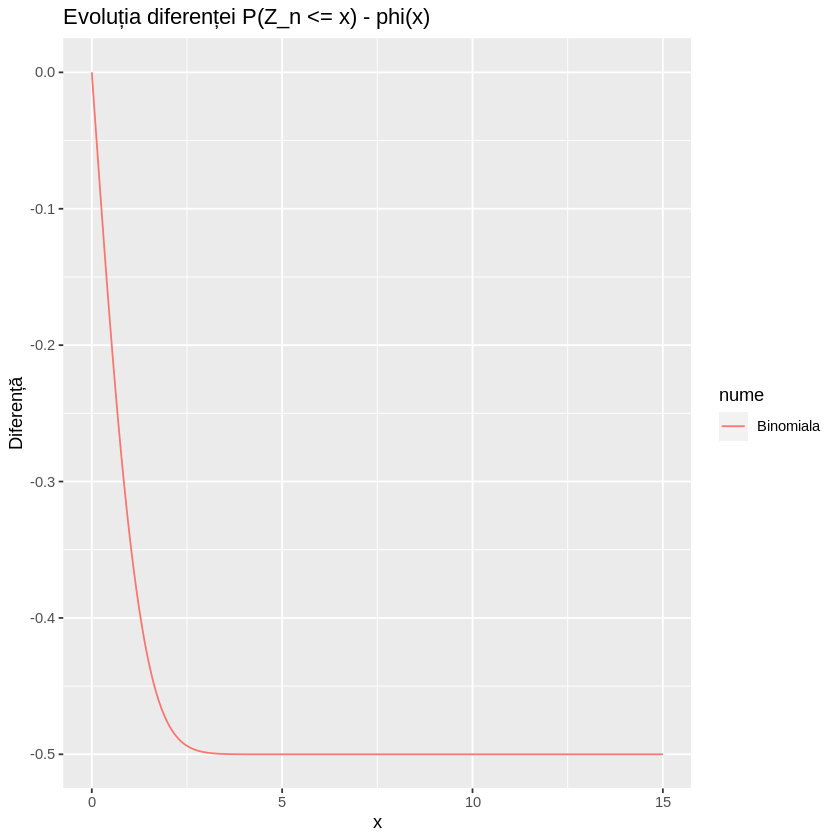

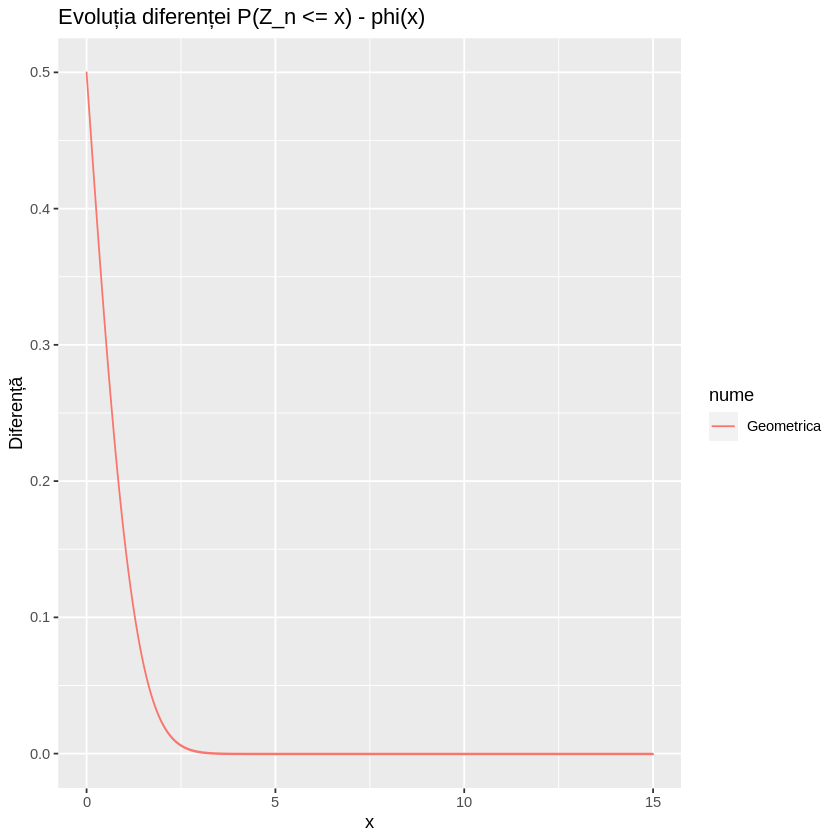

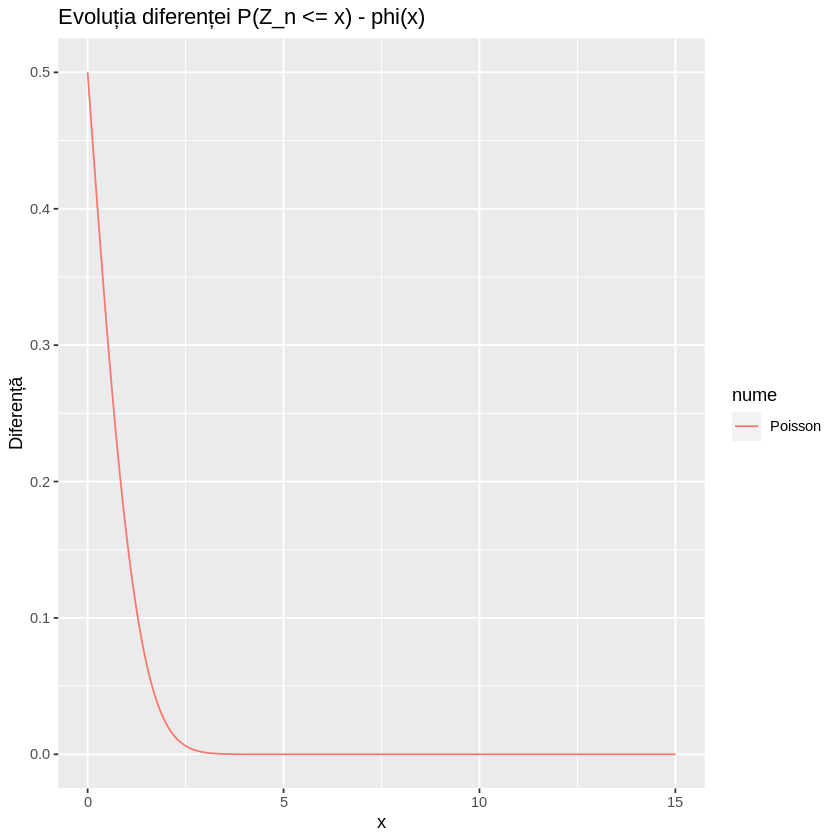

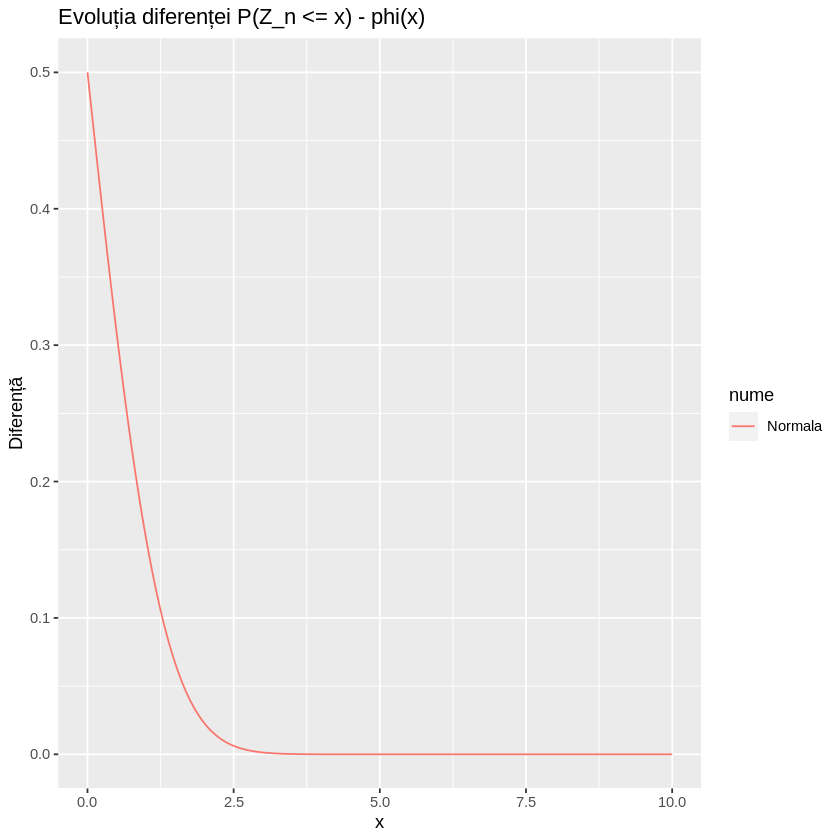

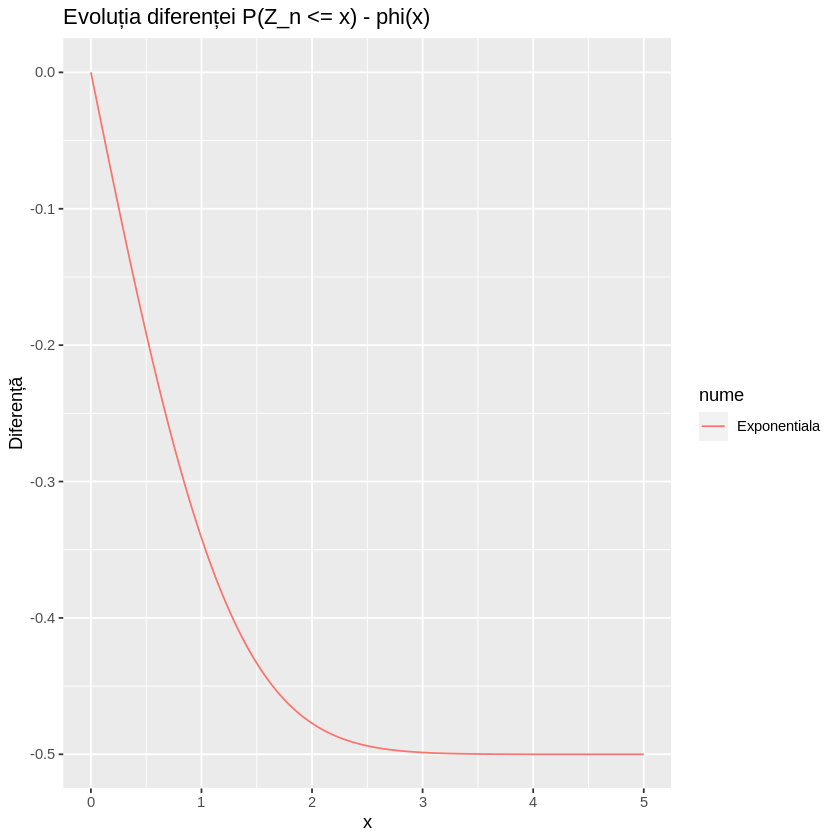

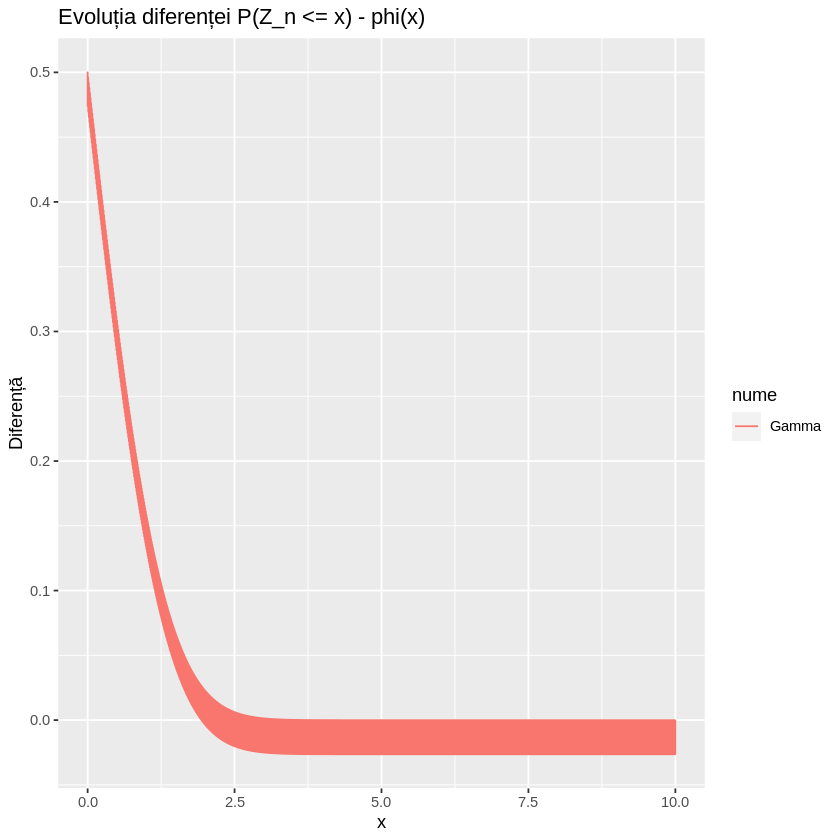

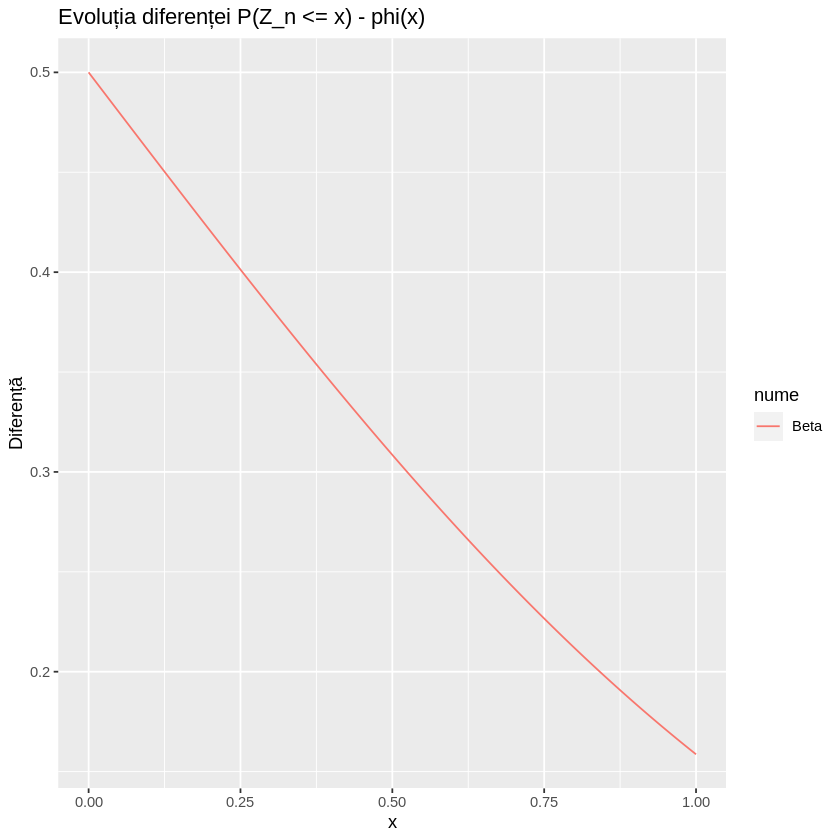

In [6]:
# 4) Functia pentru ilustrarea diferentelor
ilustrare_berry_esseen <- function(nume, f, parametri, n_val, xlim, x) {
  df <- data.frame(x = numeric(), diferenta = numeric(), nume = factor())   # data frame gol pentru a stoca datele
  for (n in n_val) {
    x_valori <- seq(xlim[1], xlim[2], length.out = 1000)                     # Generăm un set de valori x în intervalul specificat
    media <- E_x(nume, f, f_masa = 0, f_densitate = 0, parametri, x_valori)  # Calculăm media și deviația standard
    sigma <- sqrt(Varianta_x(nume, f, parametri, x_valori))
    phi <- function(x) pnorm(x)                                             # Definim funcția phi care returnează probabilitatea ca o v.a. să fie mai mică sau egală cu x, distribuită standard normal
    X_n <- sum(x) / length(x)                                                # Calculăm media eșantionului
    diferenta <- pnorm(sqrt(n) * (X_n - media) / sigma) - phi(x_valori)      # Calculăm diferența dintre distribuția Z_n și distribuția normală standard
    if (!is.null(x_valori) && !is.null(diferenta)) {                         # Adăugăm datele în data frame folosind rbind
        df <- rbind(df, data.frame(x = x_valori, diferenta = diferenta, nume = rep(nume, length(x_valori))))
    }
  }

  # Trasăm graficul folosind ggplot2
  ggplot(df, aes(x = x, y = diferenta, color = nume)) +
    geom_line() +
    labs(title = "Evoluția diferenței P(Z_n <= x) - phi(x)",
         x = "x",
         y = "Diferență")
}

n_val <- c(30, 100, 1000)
x = seq(0, 10, by = 0.1)

# Binomiala
nume_binomiala <- "Binomiala"
functie_masa_binomiala <- dbinom
parametri_binomiala <- list(m = 10, p = 0.5)
xlim_range_binomiala <- c(0, 15)
ilustrare_berry_esseen(nume_binomiala, functie_masa_binomiala, parametri_binomiala, n_val, xlim_range_binomiala, x)

# Geometrica
nume_geometrica <- "Geometrica"
functie_masa_geometrica <- dgeom
parametri_geometrica <- list(p = 0.3)
xlim_range_geometrica <- c(0, 15)
ilustrare_berry_esseen(nume_geometrica, functie_masa_geometrica, parametri_geometrica, n_val, xlim_range_geometrica, x)

# Poisson
nume_poisson <- "Poisson"
functie_masa_poisson <- dpois
parametri_poisson <- list(lambda = 2)
xlim_range_poisson <- c(0, 15)
ilustrare_berry_esseen(nume_poisson, functie_masa_poisson, parametri_poisson, n_val, xlim_range_poisson, x)

# Normala
nume_normala <- "Normala"
functie_densitate_normala <- dnorm
parametri_normala <- list(miu = 3, sigma = 1.5)
xlim_range_normala <- c(0, 10)
ilustrare_berry_esseen(nume_normala, functie_densitate_normala, parametri_normala, n_val, xlim_range_normala, x)

# Exponentiala
nume_exponentiala <- "Exponentiala"
functie_densitate_exponentiala <- dexp
parametri_exponentiala <- list(lambda = 0.2)
xlim_range_exponentiala <- c(0, 5)
ilustrare_berry_esseen(nume_exponentiala, functie_densitate_exponentiala, parametri_exponentiala, n_val, xlim_range_exponentiala, x)

# Gamma
nume_gamma <- "Gamma"
functie_densitate_gamma <- dgamma
parametri_gamma <- list(alpha = 2, beta = 0.5)
xlim_range_gamma <- c(0, 10)
ilustrare_berry_esseen(nume_gamma, functie_densitate_gamma, parametri_gamma, n_val, xlim_range_gamma, x)

# Beta
nume_beta <- "Beta"
functie_densitate_beta <- dbeta
parametri_beta <- list(alpha = 2, beta = 5)
xlim_range_beta <- c(0, 1)
ilustrare_berry_esseen(nume_beta, functie_densitate_beta, parametri_beta, n_val, xlim_range_beta, x)

In [7]:
#5) Funcție pentru calculul marginii date de inegalitatea Berry-Esseen pentru o v.a. dată

margine_berry_esseen <- function(nume, f, parametri) {
  F <- function(x) {                   # Definim funcția distribuției cumulative a v.a.
    if (is.null(f)) {                  # Verificăm dacă este distribuție discretă sau continuă
      p <- rep(0, length(x))
      for (i in 1:length(x)) {         # Distribuție discretă =>
        p[i] <- sum(f(x[1:i], parametri))  # calculăm funcția de distribuție cumulativă prin adunarea probabilitatilor
      }
      return(p)
    } else {                           # Distribuție continuă =>
      return(pnorm(x))                 # folosim funcția pnorm pentru a calcula distribuția cumulative normală standard
    }}
  D <- function(x) {                   # Definim deviația maximă a funcției distribuției cumulative față de funcția distribuției normale standard
    if (is.null(f)) {                  # Verificăm dacă este distribuție discretă sau continuă
      sup <- 0                         # Distribuție discretă =>
      for (i in 1:length(x)) {            # calculăm deviația maximă prin găsirea diferenței maxime între distribuția dată și cea normală
        sup <- max(sup, abs(F(x[i]) - pnorm(x[i])))}
      return(sup)
    } else {                           # Distribuție continuă =>
      return(max(abs(F(x) - pnorm(x))))    # folosim funcția max pentru a găsi diferența maximă între distribuția dată și cea normală
    }
  }
  # Calculăm marginea dată de inegalitatea Berry-Esseen utilizând deviația maximă
  margine <- 33/4 * media_ex3(nume, f, f_masa = 0, f_densitate = 0, parametri, x1) / sqrt(Varianta_x(nume, f, parametri, x1))^3 * 1 / sqrt(n)
  return(margine)
}

# Distribuția binomială
nume_binomiala <- "Binomiala"
functie_densitate_binomiala <- dbinom
parametri_binomiala <- list(size = 10, prob = 0.5)

margine_binomiala <- margine_berry_esseen(nume_binomiala, functie_densitate_binomiala, parametri_binomiala)
cat("Marginea pentru distribuția binomială:", margine_binomiala, "\n")

# Distribuția geometrică
nume_geometrica <- "Geometrica"
functie_densitate_geometrica <- dgeom
parametri_geometrica <- list(prob = 0.3)

margine_geometrica <- margine_berry_esseen(nume_geometrica, functie_densitate_geometrica, parametri_geometrica)
cat("Marginea pentru distribuția geometrică:", margine_geometrica, "\n")

# Distribuția normală
nume_normala <- "Normala"
functie_densitate_normala <- dnorm
parametri_normala <- list(mean = 3, sd = 1.5)

margine_normala <- margine_berry_esseen(nume_normala, functie_densitate_normala, parametri_normala)
cat("Marginea pentru distribuția normală:", margine_normala, "\n")

# Distribuția gamma
nume_gamma <- "Gamma"
functie_densitate_gamma <- dgamma
parametri_gamma <- list(shape = 2, rate = 0.5)

margine_gamma <- margine_berry_esseen(nume_gamma, functie_densitate_gamma, parametri_gamma)
cat("Marginea pentru distribuția gamma:", margine_gamma, "\n")

# Distribuția exponențială
nume_exponentiala <- "Exponentiala"
functie_densitate_exponentiala <- dexp
parametri_exponentiala <- list(rate = 0.2)

margine_exponentiala <- margine_berry_esseen(nume_exponentiala, functie_densitate_exponentiala, parametri_exponentiala)
cat("Marginea pentru distribuția exponențială:", margine_exponentiala, "\n")


ERROR: Error in media_ex3(): argument "nume" is missing, with no default


In [ ]:
## ex 2
#3

f <- function(x) {         # densitatea f
  return((sin(x))^2 * exp(-x^2/2))
}
g1 <- function(x) {        # densitatea g1
  return(exp(-abs(x))/2)
}
g2 <- function(x) {        # densitatea g2
  return(1/(2*pi*(1 + x^2/4)))
}
g3 <- function(x) {        # densitatea g3
  return(exp(-x^2/2)/sqrt(2*pi))
}

raport_fg1 <- function(x) {
  return(f(x)/g1(x))
}
raport_fg2 <- function(x) {
  return(f(x)/g2(x))
}
raport_fg3 <- function(x) {
  return(f(x)/g3(x))
}

maxim_raport_fg1 <- optimize(raport_fg1, interval = c(0, 10), maximum = TRUE)$maximum
maxim_raport_fg2 <- optimize(raport_fg2, interval = c(0, 10), maximum = TRUE)$maximum
maxim_raport_fg3 <- optimize(raport_fg3, interval = c(0, 10), maximum = TRUE)$maximum

rata_acceptare_g1 <- 1 / maxim_raport_fg1          # rata de acceptare
rata_acceptare_g2 <- 1 / maxim_raport_fg2
rata_acceptare_g3 <- 1 / maxim_raport_fg3

cat("Rata de acceptare pentru densitatea g1(x) este:", rata_acceptare_g1, "\n")
cat("Rata de acceptare pentru densitatea g2(x) este:", rata_acceptare_g2, "\n")
cat("Rata de acceptare pentru densitatea g3(x) este:", rata_acceptare_g3, "\n")



estimeaza_numar_simulari <- function(rate_acceptare, densitate) {    # Metoda simulării Monte-Carlo
  z <- qnorm(0.975)                              # pentru un interval de incredere de 95%
  err <- 0.001                                   # eroarea dorita in estimare
  n <- 10000                                     # numărul de simulări
  simulari <- replicate(n, densitate(runif(1)))  # generarea n valori aleatoare din densitate
  medie_simulari <- mean(simulari)               # media simulărilor
  varianța_simulari <- var(simulari)             # varianța simulărilor
  numar_simulari <- (z^2 * varianța_simulari) / (err^2)
  return(ceiling(numar_simulari))                # rotunjirea în sus la cel mai apropiat număr întreg
}

nr_simulari_g1 <- estimeaza_numar_simulari(rate_acceptare_g1, g1)
nr_simulari_g2 <- estimeaza_numar_simulari(rate_acceptare_g2, g2)
nr_simulari_g3 <- estimeaza_numar_simulari(rate_acceptare_g3, g3)

cat("Numărul de simulări necesare pentru densitatea g1: M =", nr_simulari_g1, "\n")
cat("Numărul de simulări necesare pentru densitatea g2: M =", nr_simulari_g2, "\n")
cat("Numărul de simulări necesare pentru densitatea g3: M =", nr_simulari_g3, "\n")


Rata de acceptare pentru densitatea g1(x) este: 0.7235696 
Rata de acceptare pentru densitatea g2(x) este: 0.8291968 
Rata de acceptare pentru densitatea g3(x) este: 0.6366252 
Numărul de simulări necesare pentru densitatea g1: M = 31170 
Numărul de simulări necesare pentru densitatea g2: M = 362 
Numărul de simulări necesare pentru densitatea g3: M = 9100 
